# Unit 3 Project (Mike Osberg)

## Linear Regression Practice Problem

In [1]:
import matplotlib.pyplot as plt

In [41]:
import pandas as pd
import numpy as np
import sklearn as sklearn
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])
print(boston['DESCR'])
boston = pd.concat([y,X], axis = 'columns')


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Data Cleaning and Exploratory Data Analysis**

*Items to include:*

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [3]:
#Data Shape
boston.shape

(506, 14)

In [4]:
#Data Types
boston.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [5]:
#Count Nulls
boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
#Basic Summary Stats
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


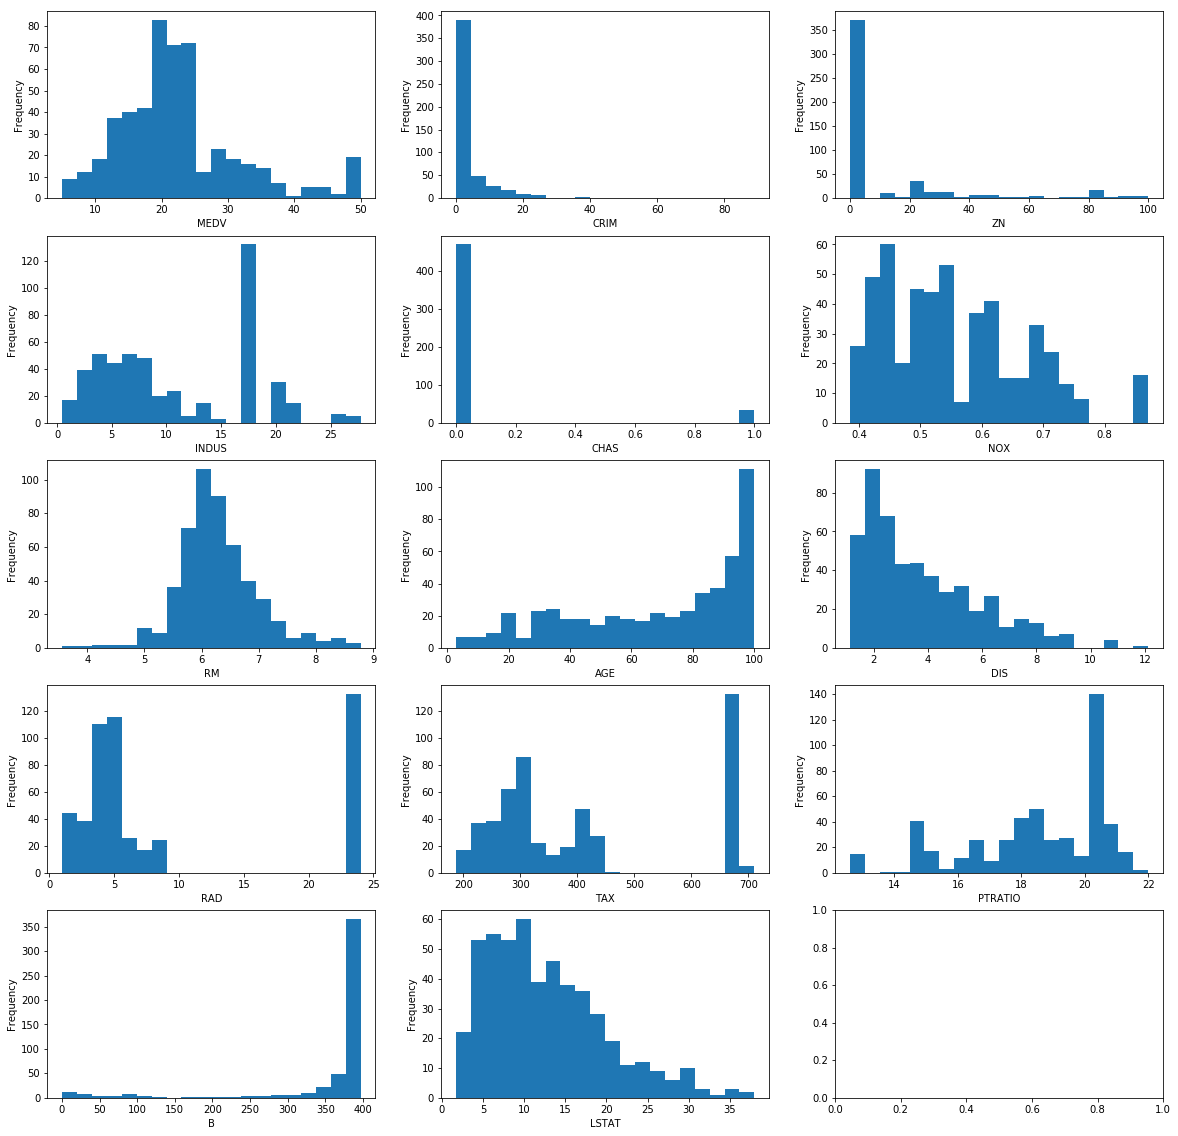

In [7]:
#Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
fig, axes = plt.subplots(5, 3, figsize=(20,20))

boston.loc[:,'MEDV'].plot(kind='hist',bins=20, ax=axes[0][0]).set_xlabel('MEDV', fontsize = 10)
boston.loc[:,'CRIM'].plot(kind='hist',bins=20, ax=axes[0][1]).set_xlabel('CRIM', fontsize = 10)
boston.loc[:,'ZN'].plot(kind='hist',bins=20, ax=axes[0][2]).set_xlabel('ZN', fontsize = 10)

boston.loc[:,'INDUS'].plot(kind='hist',bins=20, ax=axes[1][0]).set_xlabel('INDUS', fontsize = 10)
boston.loc[:,'CHAS'].plot(kind='hist',bins=20, ax=axes[1][1]).set_xlabel('CHAS', fontsize = 10)
boston.loc[:,'NOX'].plot(kind='hist',bins=20, ax=axes[1][2]).set_xlabel('NOX', fontsize = 10)

boston.loc[:,'RM'].plot(kind='hist',bins=20, ax=axes[2][0]).set_xlabel('RM', fontsize = 10)
boston.loc[:,'AGE'].plot(kind='hist',bins=20, ax=axes[2][1]).set_xlabel('AGE', fontsize = 10)
boston.loc[:,'DIS'].plot(kind='hist',bins=20, ax=axes[2][2]).set_xlabel('DIS', fontsize = 10)

boston.loc[:,'RAD'].plot(kind='hist',bins=20, ax=axes[3][0]).set_xlabel('RAD', fontsize = 10)
boston.loc[:,'TAX'].plot(kind='hist',bins=20, ax=axes[3][1]).set_xlabel('TAX', fontsize = 10)
boston.loc[:,'PTRATIO'].plot(kind='hist',bins=20, ax=axes[3][2]).set_xlabel('PTRATIO', fontsize = 10)


boston.loc[:,'B'].plot(kind='hist',bins=20, ax=axes[4][0]).set_xlabel('B', fontsize = 10)
boston.loc[:,'LSTAT'].plot(kind='hist',bins=20, ax=axes[4][1]).set_xlabel('LSTAT', fontsize = 10);


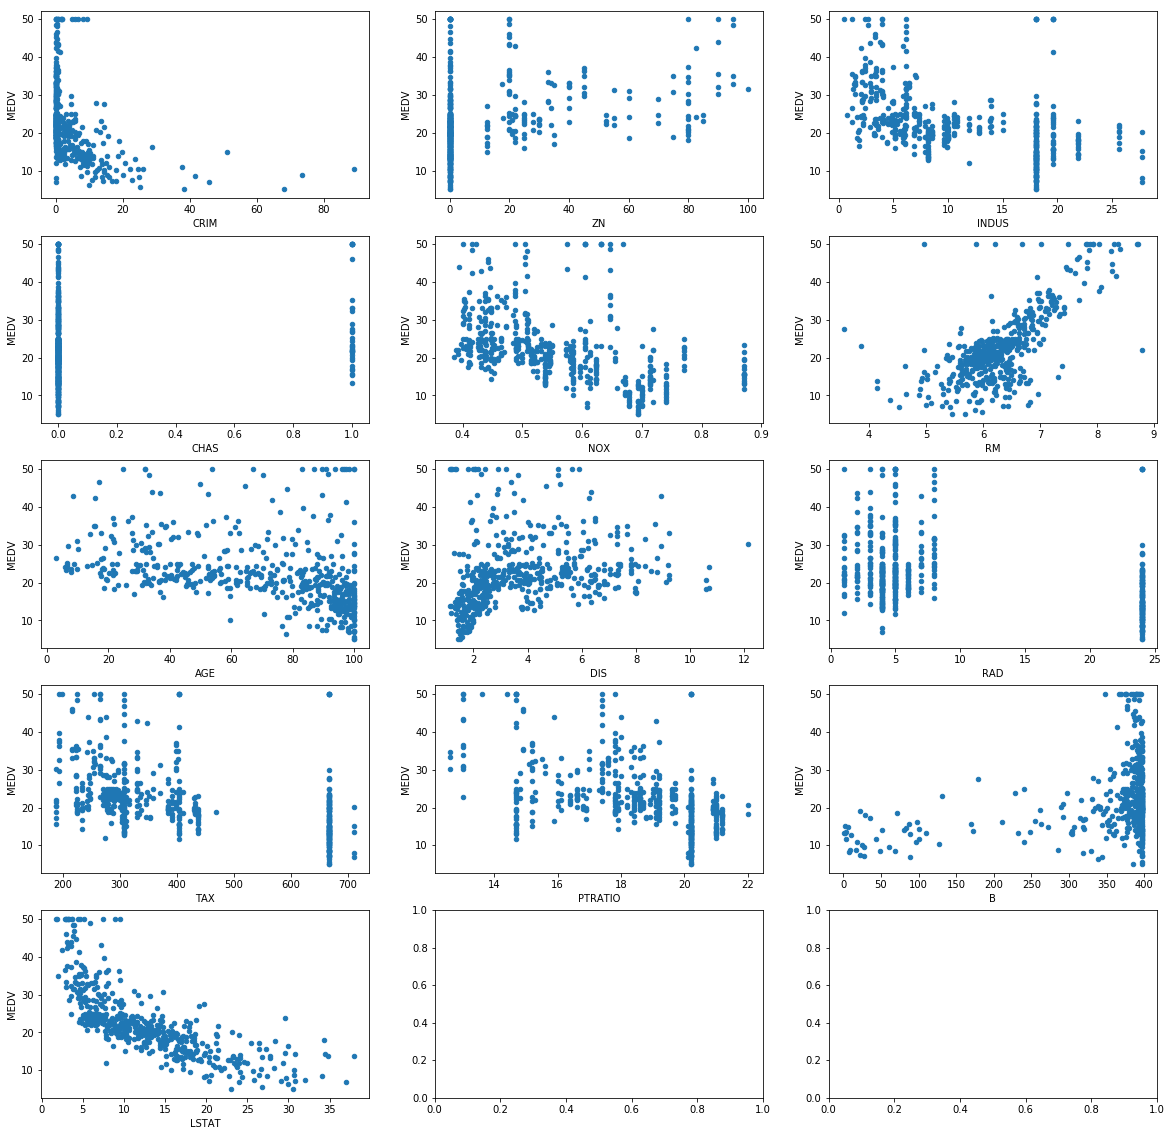

In [8]:
boston.loc[:,'MEDV'].plot(kind='hist',bins=20, ax=axes[0][0]).set_xlabel('MEDV', fontsize = 10);
#Scatterplot of each column with median price

fig, axes = plt.subplots(5, 3, figsize=(20,20))
boston.plot(kind = 'scatter', x = 'CRIM', y = 'MEDV', ax=axes[0][0])
boston.plot(kind = 'scatter', x = 'ZN', y = 'MEDV', ax=axes[0][1])
boston.plot(kind = 'scatter', x = 'INDUS', y = 'MEDV', ax=axes[0][2])

boston.plot(kind = 'scatter', x = 'CHAS', y = 'MEDV', ax=axes[1][0])
boston.plot(kind = 'scatter', x = 'NOX', y = 'MEDV', ax=axes[1][1])
boston.plot(kind = 'scatter', x = 'RM', y = 'MEDV', ax=axes[1][2])

boston.plot(kind = 'scatter', x = 'AGE', y = 'MEDV', ax=axes[2][0])
boston.plot(kind = 'scatter', x = 'DIS', y = 'MEDV', ax=axes[2][1])
boston.plot(kind = 'scatter', x = 'RAD', y = 'MEDV', ax=axes[2][2])

boston.plot(kind = 'scatter', x = 'TAX', y = 'MEDV', ax=axes[3][0])
boston.plot(kind = 'scatter', x = 'PTRATIO', y = 'MEDV', ax=axes[3][1])
boston.plot(kind = 'scatter', x = 'B', y = 'MEDV', ax=axes[3][2])

boston.plot(kind = 'scatter', x = 'LSTAT', y = 'MEDV', ax=axes[4][0]);

In [9]:
#Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)
from sklearn import metrics

null_pred = np.zeros(y.shape)
null_pred += boston.loc[:,'MEDV'].mean()

null_mse = metrics.mean_squared_error(null_pred, y)
null_mse


84.41955615616554

In [10]:
# Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#create our features and target
feature_cols = ['TAX', 'RM','DIS']
X = boston.loc[:,feature_cols]
y = boston.loc[:,'MEDV']

#create a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

#instantiate the model
lr_boston = LinearRegression()

#fit the model on our training set
lr_boston.fit(X_train, y_train)

#using the fit model, make predictions on both our training and test set
y_pred_train = lr_boston.predict(X_train)
y_pred_test = lr_boston.predict(X_test)

#using the predicted values from our predictions of the training and test set, calculated the MSE for each sample. print the MSE
train_mse = metrics.mean_squared_error(y_train, y_pred_train)
test_mse = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE on train set = ', train_mse)
print('MSE on test set = ', test_mse)

MSE on train set =  31.430079284907137
MSE on test set =  50.770598025581485


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [11]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = True)

In [12]:
#create an emtpy array that will collect the MSE values from the model runs on each of the 10 folds
train_mse_values = [] 
test_mse_values = []

#create a function that will go through each fold, run the regrssion, and test it
for train_indices, test_indices in kf.split(X,y): 
    lr_boston = LinearRegression()
    
#pull the indices that were split in the kfold function above
    X_train = X.iloc[train_indices, :] 
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
#run the model based on the train and test dfs from above
    lr_boston.fit(X_train, y_train) 
    y_pred_train = lr_boston.predict(X_train)
    y_pred_test = lr_boston.predict(X_test)
    
#calcluate the MSE from each model run
    train_mse = metrics.mean_squared_error(y_train, y_pred_train) 
    test_mse = metrics.mean_squared_error(y_test, y_pred_test)
    
#add the outputs of the MSE function into the arrays we created at the top    
    train_mse_values.append(train_mse) 
    test_mse_values.append(test_mse)

#print the average MSE for the train and test sets (across 10 folds)
print('Average train MSE', sum(train_mse_values)/10) 
print('Average test MSE', sum(test_mse_values)/10)

Average train MSE 36.95278780926166
Average test MSE 37.601834031373905


In [13]:
#I re-ran the model using cross_val_score rather than a for loop of train_test splits. I'm not sure why the MSE on the test set is so much higher for this. 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 10, shuffle=True)
train2_mse = np.mean(-cross_val_score(lr_boston, X_train, y_train, cv=kf, scoring = 'neg_mean_squared_error'))
test2_mse = np.mean(-cross_val_score(lr_boston, X_test, y_test, cv=kf, scoring = 'neg_mean_squared_error'))
print('Average train MSE', train2_mse) 
print('Average test MSE', test2_mse)

Average train MSE 37.829820029207426
Average test MSE 54.03694075415888


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The training set did much better compared to the null model (84 down to 31, 36 or 37 depending on which method we used to build the model). This tells me that (at least) my model is improving the bias over the null model

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

In all of my different model runs, the test set had a high MSE than on the training set. This suggests that I increased the variance in my model (i.e. I likely overfit slightly), which made my model less generalizeable to a new set of data. 

- How much of a bias problem does your model appear to have? Why do you say that?

Both the MSE of the train and test sets are quite a bit lower than the null MSE, so it doesn't seem that I have too big of an issue with bias in my model. 

- How much of a variance problem does your model appear to have? Why do you say that?

Well, I have to say that I'm sort of confused. I understand why the MSE result would be so much differnet between a single train_test split result. It could very well be that the way that it was split in that first version was just a set of the data that got lucky. However, when I did the kffolds cross validation my test MSE went up. Hwoever, I don't understand why there is such a difference between my test MSE using a for loop and train_test_split (MSE of 37) versus the MSE using cross_val_score (MSE of 54). If the former score is to be believed, then I don't think the model appears to have that big of a variance problem. However, if the latter MSE is to be believed, then I would start to worry about the variance problem in my model. 

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

*See the model below*

It looks like the bias got worse, but perhaps the variance is a little bit better (still unsure). The overall model got worse, with an MSE on the test set that is approximately 6 units higher than when I ran the model above using the same method. 

In [102]:
feature_cols = ['RM','DIS']
X_new = boston.loc[:,feature_cols]
y_new = boston.loc[:,'MEDV']

#create an emtpy array that will collect the MSE values from the model runs on each of the 10 folds
train_mse_values = [] 
test_mse_values = []

#create a function that will go through each fold, run the regrssion, and test it
for train_indices, test_indices in kf.split(X_new,y_new): 
    lr_boston = LinearRegression()
    
#pull the indices that were split in the kfold function above
    X_train = X_new.iloc[train_indices, :] 
    y_train = y_new.iloc[train_indices]
    X_test = X_new.iloc[test_indices, :]
    y_test = y_new.iloc[test_indices]
    
#run the model based on the train and test dfs from above
    lr_boston.fit(X_train, y_train) 
    y_pred_train = lr_boston.predict(X_train)
    y_pred_test = lr_boston.predict(X_test)
    
#calcluate the MSE from each model run
    train_mse = metrics.mean_squared_error(y_train, y_pred_train) 
    test_mse = metrics.mean_squared_error(y_test, y_pred_test)
    
#add the outputs of the MSE function into the arrays we created at the top    
    train_mse_values.append(train_mse) 
    test_mse_values.append(test_mse)

#print the average MSE for the train and test sets (across 10 folds)
print('Average train MSE', sum(train_mse_values)/10) 
print('Average test MSE', sum(test_mse_values)/10)

Average train MSE 42.55220323896723
Average test MSE 43.19738287096129


## KNN Practice Problem

In [14]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [15]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [16]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [17]:
#Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.
iris.loc[:,'species_num'] = iris.loc[:,'species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


**Data Cleaning and Exploratory Data Analysis**

In [18]:
#data shape
iris.shape

(150, 6)

In [19]:
#data types
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [20]:
#count of null values by column
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [21]:
#basic summary statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [22]:
#number of unique values for each column
iris.loc[:,'species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

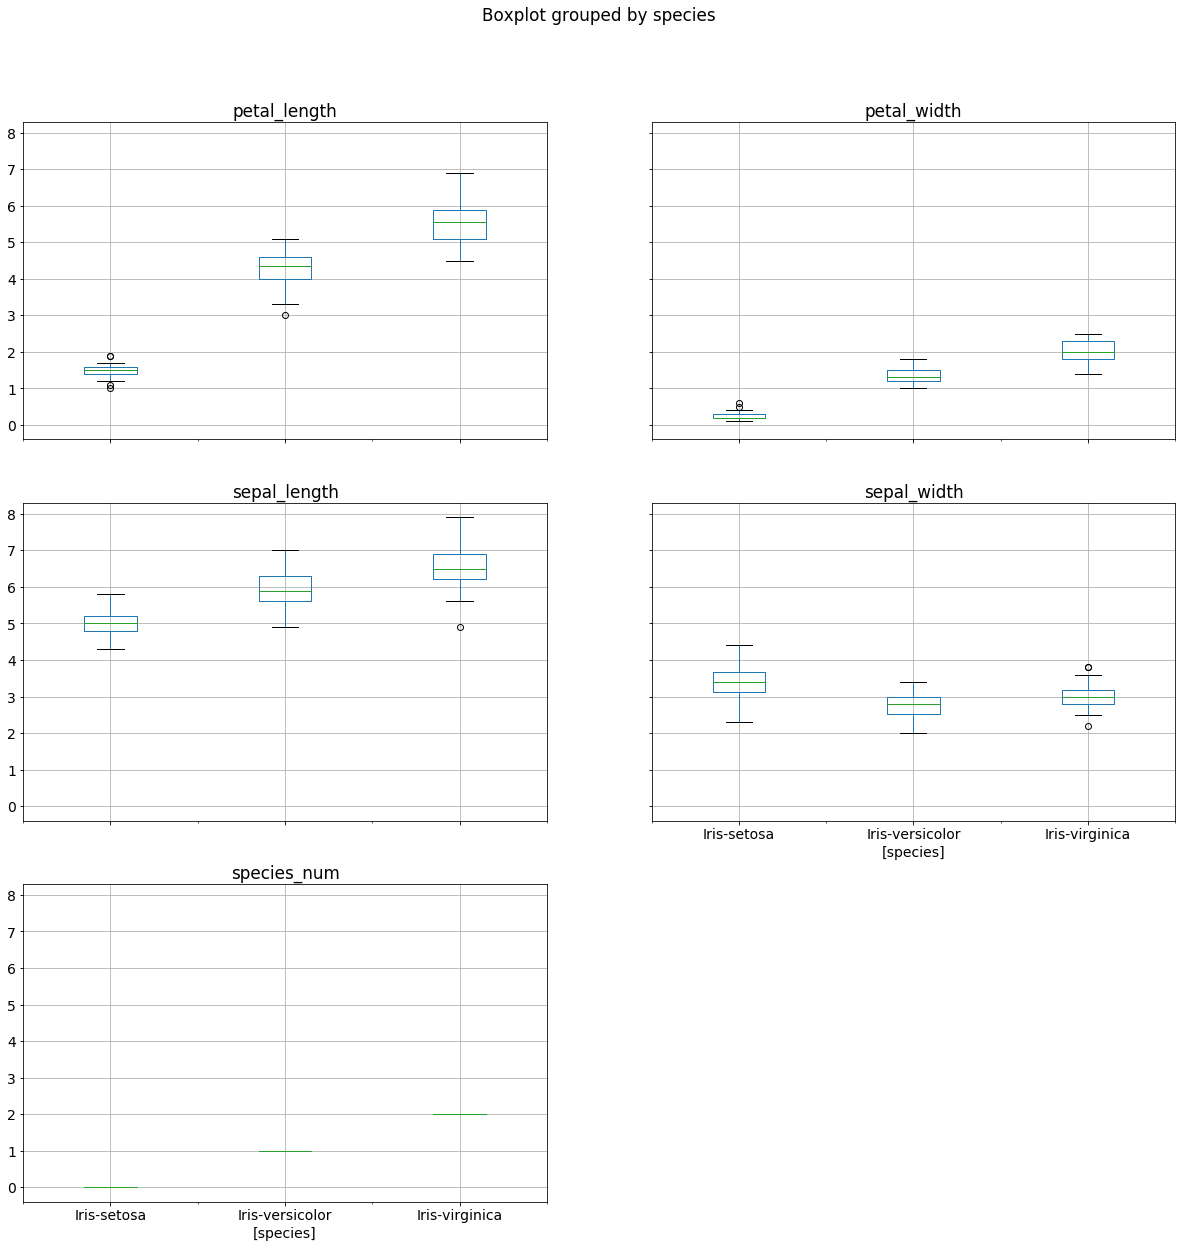

In [23]:
#plot the distribution of each column grouped by species
ax = iris.boxplot(by = 'species', figsize = (20,20))

In [24]:
y = iris.loc[:,'species_num']

In [34]:
#Get the accuracy of a null model that simply predicts the most common species
most_common_value  = y.value_counts().idxmax()
null_pred = np.zeros(y.shape) + most_common_value #this would be a vector full of the most common value as your prediction
metrics.accuracy_score(null_pred,y)



0.3333333333333333

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [27]:
from sklearn.neighbors import KNeighborsClassifier

**Running the Model Using Cross_Val_Score**

In [113]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris.loc[:,feature_cols]
y = iris.loc[:,'species_num']

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [115]:
from sklearn.model_selection import KFold

kf = KFold(10, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=15)
np.mean(cross_val_score(knn, X_std, y, cv=kf, scoring='accuracy'))

0.9666666666666666

**Running the Model with 10 fold cross validation using train_test_split**

In [103]:
from sklearn.model_selection import train_test_split

#create a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

scaler.fit(X_train) #you normally just want to do this on the training set - I'm not sure why. this learns the standard devaition of these columns
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#instantiate the model
knn_iris = KNeighborsClassifier(n_neighbors=15)

#fit the model on our training set
knn_iris.fit(X_train_std, y_train)

#using the fit model, make predictions on both our training and test set
y_pred_train = knn_iris.predict(X_train_std)
y_pred_test = knn_iris.predict(X_test_std)

print("Training accuracy: ", metrics.accuracy_score(y_train, y_pred_train))
print("Test accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

Training accuracy:  0.9642857142857143
Test accuracy:  0.9473684210526315


In [123]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris.loc[:,feature_cols]
y = iris.loc[:,'species_num']

kf = KFold(n_splits = 10, shuffle = True)

train_accuracy_values = []
test_accuracy_values = []

#create a function that will go through each fold, run the regression and test it
for train_indices, test_indices in kf.split(X, y):
    knn_iris = KNeighborsClassifier(n_neighbors=15)
    
#pull the indices that were split in the kfold function above
    X_train = X.iloc[train_indices, :] 
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]

#re-scale our feature data frame
    scaler.fit(X_train) #you normally just want to do this on the training set - I'm not sure why. this learns the standard devaition of these columns
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    
#run the model based on the train and test dfs from above, using the standarized X dataframes
    knn_iris.fit(X_train_std, y_train)
    y_pred_train = knn_iris.predict(X_train_std)
    y_pred_test = knn_iris.predict(X_test_std)
 
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    train_accuracy_values.append(accuracy_train)
    test_accuracy_values.append(accuracy_test)
    
print("Training accuracy: ", sum(train_accuracy_values)/10)
print("Test accuracy: ", sum(test_accuracy_values)/10)

Training accuracy:  0.9688888888888887
Test accuracy:  0.9666666666666668


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

My model did a lot better than the null model. the accuracy is over 96% on the training set, whereas the null model only predicted 33% correctly. This tells me that my model has low bias. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

My model seemed to nearly the same on the test and the train set. That seems odd to me. It seems like I probably did something wrong, but I can't figure out what is incorrect. This tells me that there is very low variance in my model. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Doesn't really seem to have a problem with either. It seems to both predict the flowers well in the training set and also accuracy levels stay similarily high in the test set, suggesting that the model is generalizeable to data it hasn't seen before. 

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

Seems like if I lower k, the model gets slightly worse. Down by about 2% in the test set than the model before with a k of 10. 

In [129]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris.loc[:,feature_cols]
y = iris.loc[:,'species_num']

kf = KFold(n_splits = 10, shuffle = True)

train_accuracy_values = []
test_accuracy_values = []

#create a function that will go through each fold, run the regression and test it
for train_indices, test_indices in kf.split(X, y):
    knn_iris = KNeighborsClassifier(n_neighbors=6)
    
#pull the indices that were split in the kfold function above
    X_train = X.iloc[train_indices, :] 
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]

#re-scale our feature data frame
    scaler.fit(X_train) #you normally just want to do this on the training set - I'm not sure why. this learns the standard devaition of these columns
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    
#run the model based on the train and test dfs from above, using the standarized X dataframes
    knn_iris.fit(X_train_std, y_train)
    y_pred_train = knn_iris.predict(X_train_std)
    y_pred_test = knn_iris.predict(X_test_std)
 
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    train_accuracy_values.append(accuracy_train)
    test_accuracy_values.append(accuracy_test)
    
print("Training accuracy: ", sum(train_accuracy_values)/10)
print("Test accuracy: ", sum(test_accuracy_values)/10)

Training accuracy:  0.9666666666666666
Test accuracy:  0.9466666666666669


- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

Looks like I would want to use something that is around 20 for my K. That is where there is a plateau of the highest accuracy for the model. 

In [130]:
test_scores = []
train_scores = []

feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris.loc[:,feature_cols]
y = iris.loc[:,'species_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

scaler.fit(X_train) #you normally just want to do this on the training set - I'm not sure why. this learns the standard devaition of these columns
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

for k in range(1,100): #for each number of k in the range 1 to 100
    knn = KNeighborsClassifier(n_neighbors=k) # we are creating a model
    knn.fit(X_train_std, y_train) #we are fitting that model on the training data
    
    train_preds = knn.predict(X_train_std) #we are predicting both the train and the test set
    test_preds = knn.predict(X_test_std)
   
    train_accuracy = metrics.accuracy_score(train_preds, y_train) #and then we are evaluating the accuracy of both models
    test_accuracy = metrics.accuracy_score(test_preds, y_test)
    
    train_scores.append(train_accuracy) #and then we are appending the scores into an list
    test_scores.append(test_accuracy)

In [133]:
# Store k and associated training scores in a DataFrame
accuracy_scores_df = pd.DataFrame({'k':range(1,100),'train_scores':train_scores,'test_scores':test_scores})


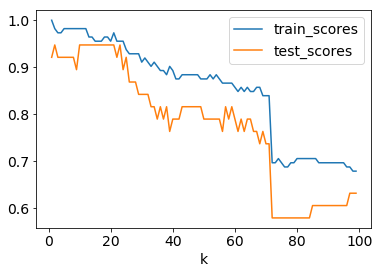

In [134]:
# Plot training scores against k
ax = accuracy_scores_df.plot(x='k')
